### 0. Import libraries

In [3]:
import numpy as np
import torch
torch.manual_seed(123)
from scipy import interpolate
import random
from scipy.integrate import solve_ivp


# set plotting params for the notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = [20, 10]
mpl.rcParams['figure.dpi'] = 300
np.set_printoptions(precision=5)
from matplotlib import cm
plt.rcParams.update(
        {
            "text.usetex": True,
            "font.family": "serif",
            "font.serif": ["Times"],
            "font.size": 12,
        }
    )

### 1. Import the data

In [4]:
X_grid = np.genfromtxt('../data/Xgrid_lasersparse.csv', delimiter=',')
Y_grid = np.genfromtxt('../data/Ygrid_lasersparse.csv', delimiter=',')
XY_train = torch.from_numpy(np.genfromtxt('../data/XY_train_lasersparse.csv', delimiter=','))
XY_test = torch.from_numpy(np.genfromtxt('../data/XY_test_lasersparse.csv', delimiter=','))
UV_train = torch.from_numpy(np.genfromtxt('../data/UV_train_lasersparse.csv', delimiter=','))

### 2. Visualize data

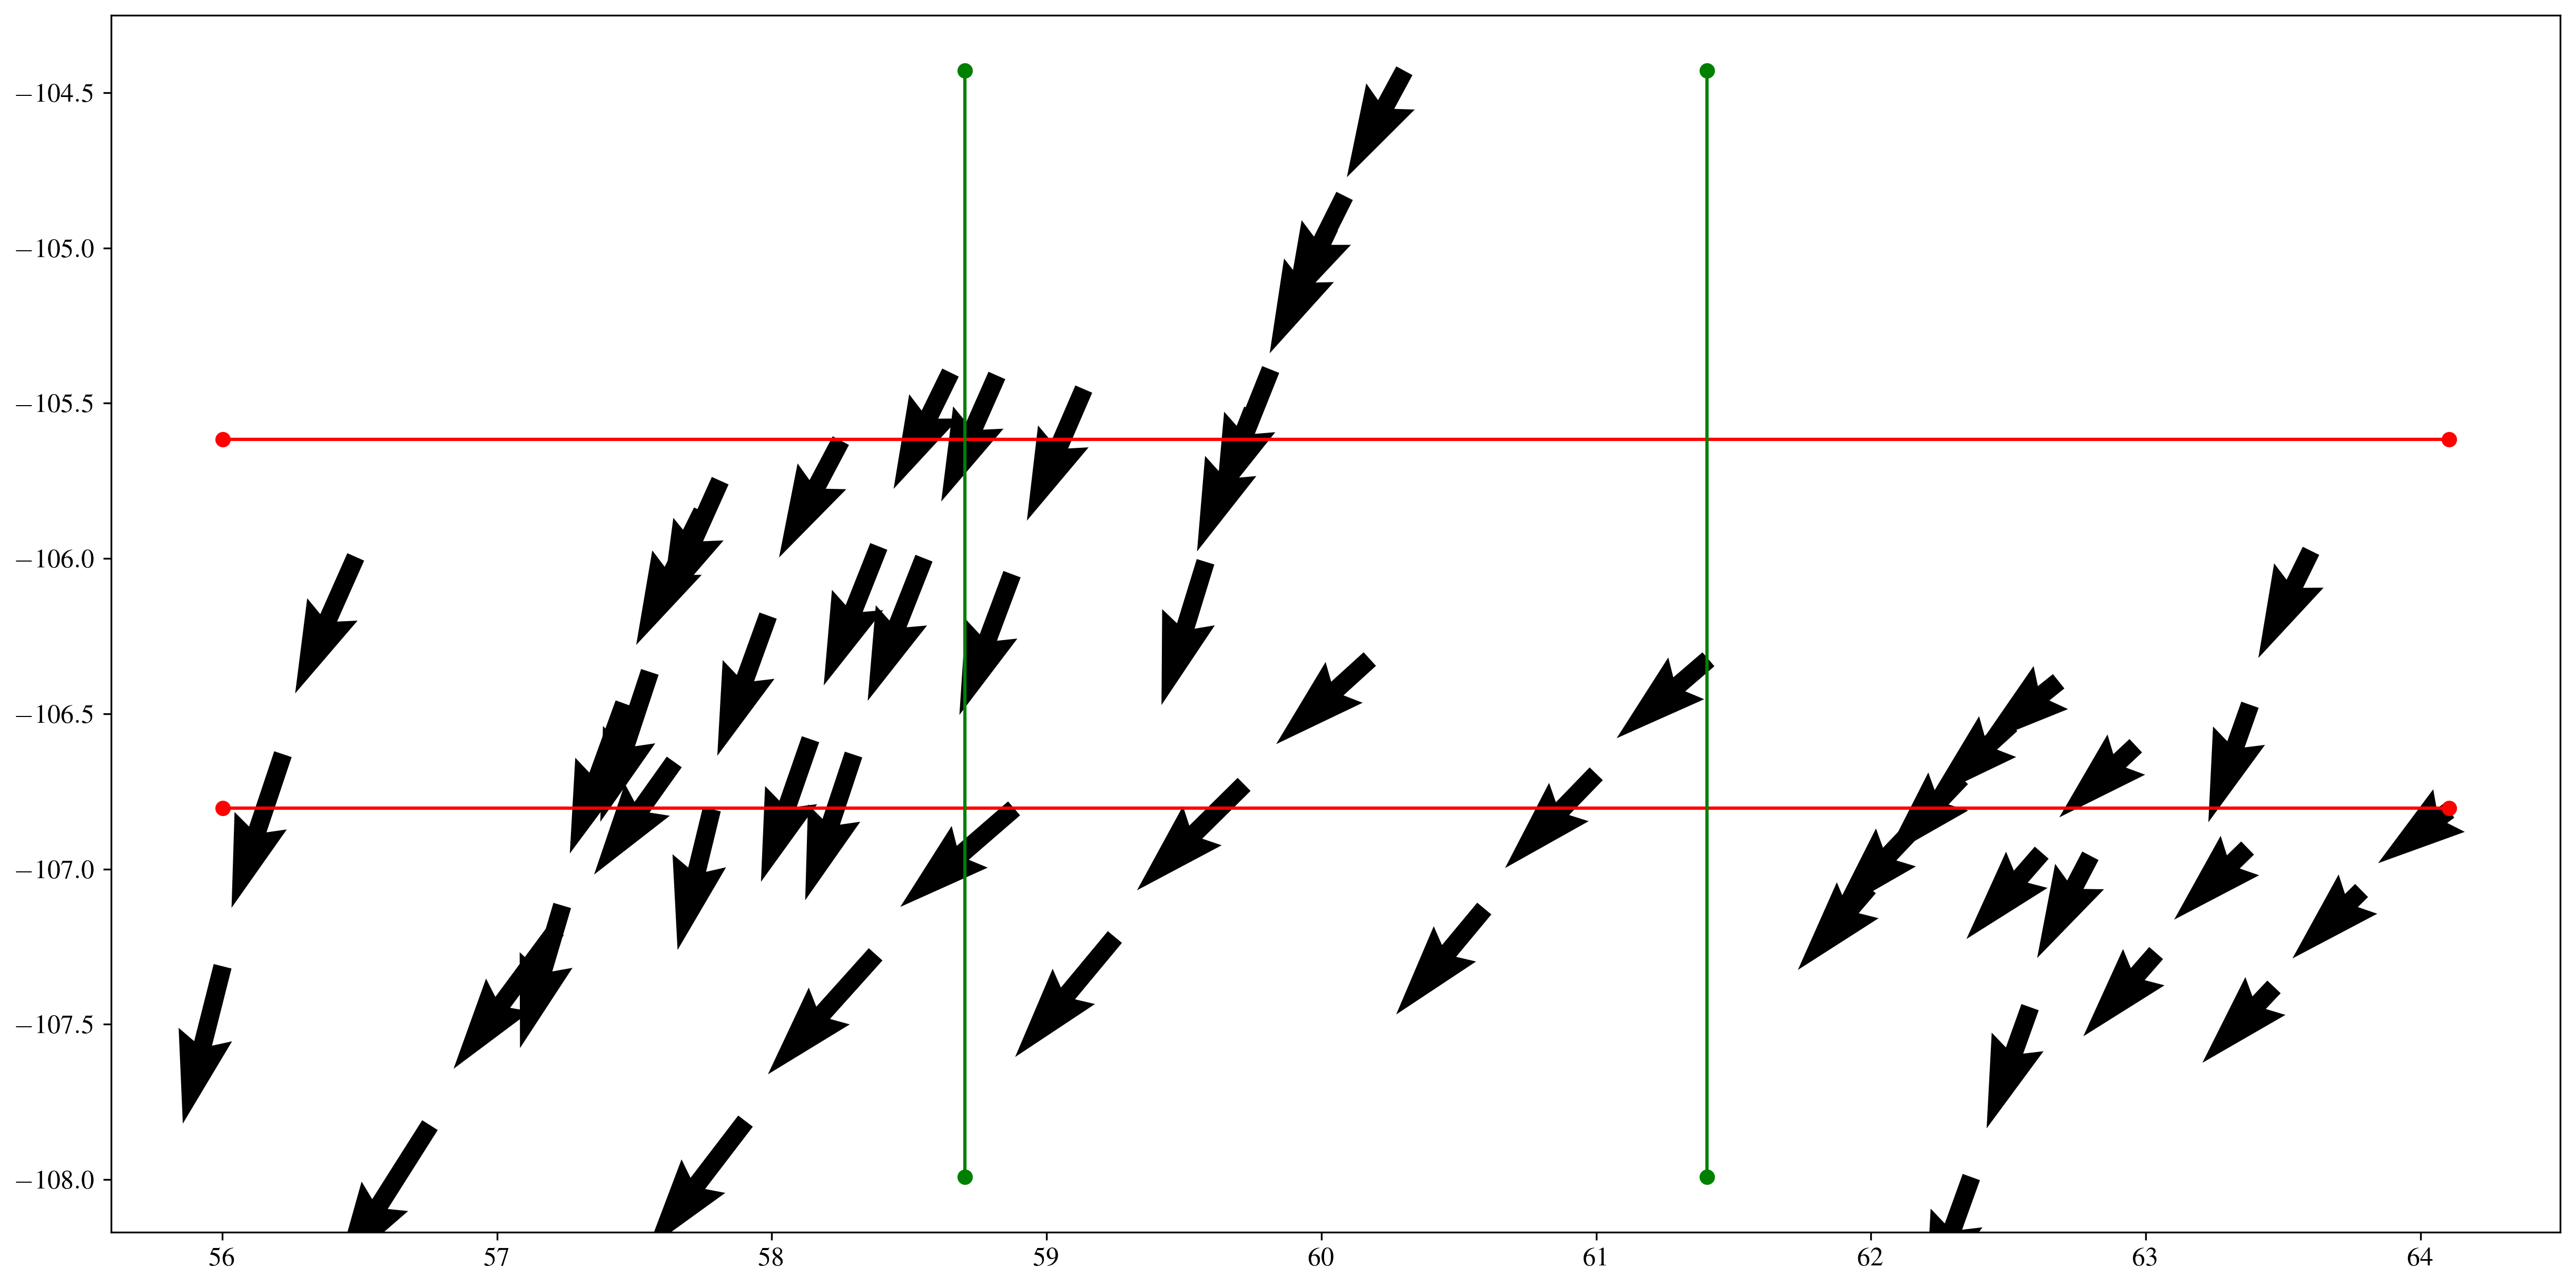

In [23]:
min_long = torch.min(XY_train[:,0])
max_long = torch.max(XY_train[:,0])
min_lat = torch.min(XY_train[:,1])
max_lat = torch.max(XY_train[:,1])
split_long = 3
offset_long = (abs(max_long - min_long))/split_long
split_lat = 3
offset_lat = (abs(max_lat - min_lat))/split_lat

plt.quiver(XY_train[:,0], XY_train[:,1], UV_train[:,0], UV_train[:,1])

p1, p2 = [min_long, max_long], [max_lat-offset_lat, max_lat-offset_lat]
p3, p4 = [min_long, max_long], [max_lat-2*offset_lat, max_lat-2*offset_lat]
p5, p6 = [min_long+offset_long, min_long+offset_long], [max_lat, min_lat]
p7, p8 = [min_long+2*offset_long, min_long+2*offset_long], [max_lat, min_lat]
plt.plot(p1, p2, p3, p4, marker='o', c='red')
plt.plot(p5, p6, p7, p8, marker='o', c='green')

In [28]:
lat_splits = [max_lat - i*offset_lat for i in range(split_lat+1)]
long_splits = [min_long + i*offset_long for i in range(split_long+1)]

In [37]:
train_splits = []
test_splits = []
for i in range(len(lat_splits)-1):
    for j in range(len(long_splits)-1):
        mask_long = (XY_train[:,0] >= long_splits[j]) & (XY_train[:,0] < long_splits[j+1])
        mask_lat = (XY_train[:,1] <= lat_splits[i]) & (XY_train[:,1] > lat_splits[i+1])
        mask = mask_long & mask_lat
        test_splits.append(mask)
        train_splits.append(~mask)

XY_iterable = {"train_splits" : train_splits,
                "test_splits" : test_splits,
                "XY" : XY_train,
                "UV" : UV_train}